In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading processed dataset
df = pd.read_csv('/content/Data-Processed-Crop-Recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2024,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2025,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2026,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2027,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2028,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
# data shape
df.shape

(2029, 8)

In [ ]:
# data size
df.size

16232

In [ ]:
# coloumns
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# data types of data
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2029 non-null   int64  
 1   P            2029 non-null   int64  
 2   K            2029 non-null   int64  
 3   temperature  2029 non-null   float64
 4   humidity     2029 non-null   float64
 5   ph           2029 non-null   float64
 6   rainfall     2029 non-null   float64
 7   label        2029 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 126.9+ KB


In [ ]:
# statistical info of numeric data type
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000
mean,52.017743,49.659438,41.171020,25.637182,70.734893,6.478735,102.474815
std,37.405221,29.172138,39.500791,4.621404,22.579060,0.716484,52.851857
min,0.000000,5.000000,5.000000,10.786898,14.258040,4.193189,20.211267
25%,22.000000,26.000000,20.000000,23.004459,59.245806,6.002927,63.465465
50%,38.000000,48.000000,30.000000,25.673850,79.592425,6.442393,95.123221
75%,87.000000,66.000000,47.000000,28.523797,89.618502,6.933810,126.726537
max,140.000000,145.000000,200.000000,40.788818,99.981876,8.766129,267.976195


In [ ]:
# non numeric data
df.describe(include = 'object')

,label
count,2029
unique,22
top,mango
freq,100


In [ ]:
df.label.value_counts()

mango          100
pomegranate    100
jute           100
cotton         100
coconut        100
muskmelon      100
watermelon     100
maize          100
banana         100
coffee         100
lentil         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
chickpea        97
orange          96
papaya          83
rice            78
mothbeans       73
apple           57
grapes          45
Name: label, dtype: int64

<Axes: >

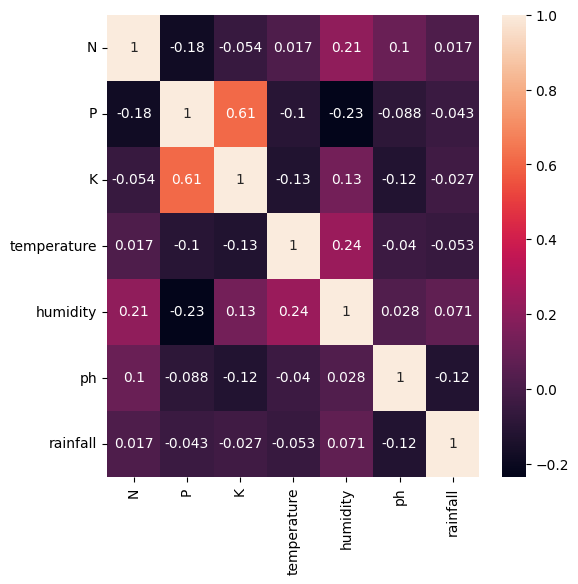

In [ ]:
# heatmap
plt.figure(figsize = (6, 6))
corr = df.corr()
sns.heatmap(corr, annot = True)

<font color = green>**Separating Features and Target labels**</font>

In [ ]:
X = df.drop('label', axis = 'columns')
y = df.label

In [ ]:
print(X.shape, y.shape)

(2029, 7) (2029,)


In [ ]:
# Initializing empty lists to store model and its accuracies
model = []
acc = []

In [ ]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1623, 7) (406, 7) (1623,) (406,)


# <font color = blue>LOGISTIC REGRESSOR</font>

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_predict = LogReg.predict(X_test)
score = accuracy_score(y_test, y_predict)
acc.append(score)
model.append('Logistic Regression')
print('Accuracy of Logistic Regression is:', score)
print(classification_report(y_test, y_predict))

Accuracy of Logistic Regression is: 0.9556650246305419
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       0.88      0.95      0.91        22
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        27
      coffee       0.91      1.00      0.95        21
      cotton       0.94      1.00      0.97        15
      grapes       1.00      1.00      1.00         9
        jute       0.76      0.65      0.70        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00         9
   mothbeans       0.92      0.75      0.83        16
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00   

In [ ]:
# cross validation score (Logistic Regressor)
cv_score = cross_val_score(LogReg, X, y, cv = 10)
cv_score

array([0.95566502, 0.95566502, 0.95566502, 0.95566502, 0.95566502,
       0.97044335, 0.96551724, 0.95566502, 0.95566502, 0.94554455])

<font color = green>**Saving Trained Logistic Regression model**</font>

In [ ]:
pickle.dump(LogReg, open('LogReg.pkl', 'wb'))

# <font color = blue>GAUSSIAN NAIVE BAYES</font>

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)
score = accuracy_score(y_test, y_predict)
acc.append(score)
model.append('Naive Bayes')
print('Accuracy of Naive Bayes is: ', score)
print(classification_report(y_test, y_predict))

Accuracy of Naive Bayes is:  0.9901477832512315
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00         9
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00         9
   mothbeans       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00

In [ ]:
# cross validation score (Gaussian Naive Bayes)
cv_score = cross_val_score(nb, X, y, cv = 10)
cv_score

array([1.        , 0.99507389, 1.        , 0.99014778, 0.99014778,
       1.        , 0.99014778, 0.99014778, 0.99014778, 0.9950495 ])

<font color = green>**Saving Trained Gaussian Naive Bayes model**</font>

In [ ]:
pickle.dump(nb, open('NB.pkl', 'wb'))

# <font color = blue>SUPPORT VECTOR MACHINE</font>

In [ ]:
# scaling data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly', degree = 3, C = 1)
SVM.fit(X_train_norm, y_train)
y_predict = SVM.predict(X_test_norm)
score = accuracy_score(y_test, y_predict)
acc.append(score)
model.append('Support Vector Machine')
print('Accuracy of Support Vectoe Machine is:', score)
print(classification_report(y_test, y_predict))

Accuracy of Support Vectoe Machine is: 0.9827586206896551
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.95      0.98        21
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00         9
        jute       0.79      0.95      0.86        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      1.00      0.97        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00         9
   mothbeans       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00

In [ ]:
# cross validation score (SVM)
cv_score = cross_val_score(SVM, X, y, cv = 10)
cv_score

array([0.98029557, 0.97044335, 0.99014778, 0.97536946, 0.99507389,
       0.99014778, 0.98522167, 0.97536946, 0.98522167, 0.98514851])

<font color = green>**Saving Trained Support Vector Machine model**</font>

In [ ]:
pickle.dump(SVM, open('SVM.pkl', 'wb'))

# <font color = blue>DECISION TREE </font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
score = accuracy_score(y_test, y_predict)
acc.append(score)
model.append('Decision Tree Classifier')
print('Accuracy of Decision Tree Classifier: ', score)
print(classification_report(y_test, y_predict))

Accuracy of Decision Tree Classifier:  0.8990147783251231
              precision    recall  f1-score   support

       apple       0.64      1.00      0.78        18
      banana       1.00      1.00      1.00        19
   blackgram       0.81      0.95      0.88        22
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        15
      grapes       0.00      0.00      0.00         9
        jute       1.00      0.10      0.18        20
 kidneybeans       1.00      0.85      0.92        20
      lentil       1.00      1.00      1.00        17
       maize       0.77      0.94      0.85        18
       mango       1.00      0.78      0.88         9
   mothbeans       1.00      0.69      0.81        16
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00

In [ ]:
# cross validation score (Decision Tree)
cv_score = cross_val_score(DT, X, y, cv = 10)
cv_score

array([0.96551724, 0.96551724, 0.93596059, 0.95073892, 0.93596059,
       0.90640394, 0.95566502, 0.9408867 , 0.95566502, 0.95049505])

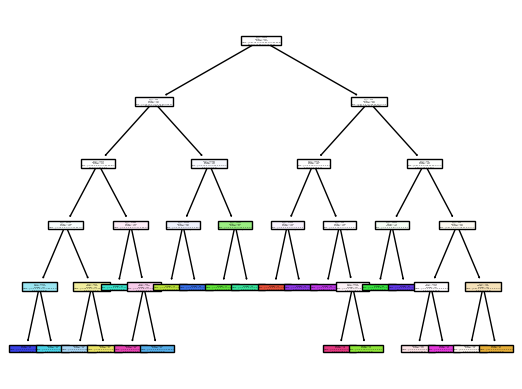

In [ ]:
from sklearn import tree
tree.plot_tree(DT, filled = True)
plt.show()

<font color = green>**Saving Trained Decision Tree model**</font>

In [ ]:
pickle.dump(DT, open('DT.pkl', 'wb'))

# <font color = blue>RANDOM FOREST</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
score = accuracy_score(y_test, y_predict)
acc.append(score)
model.append('Random Forest Classifier')
print('Accuracy of Random Forest Classifier is: ', score)
print(classification_report(y_test, y_predict))

Accuracy of Random Forest Classifier is:  0.9950738916256158
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00         9
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00         9
   mothbeans       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1

In [ ]:
# cross validation score (Random Forest)
cv_score = cross_val_score(RF, X, y, cv = 10)
cv_score

array([0.99507389, 0.99507389, 1.        , 0.98522167, 0.99507389,
       0.99507389, 0.99507389, 0.99507389, 0.98029557, 0.9950495 ])

<font color = green> **Saving Trained Random Forest model**</font>

In [ ]:
pickle.dump(RF, open('RF.pkl', 'wb'))

# <font color = blue>MODELS AND ACCURACIES</font>

In [ ]:
accuracy = pd.DataFrame({
    'Model' : model,
    'Accuracy' : acc},
    columns = ['Model', 'Accuracy']
)

In [ ]:
accuracy

,Model,Accuracy
0,Logistic Regression,0.955665
1,Naive Bayes,0.990148
2,Support Vector Machine,0.982759
3,Decision Tree Classifier,0.899015
4,Random Forest Classifier,0.995074


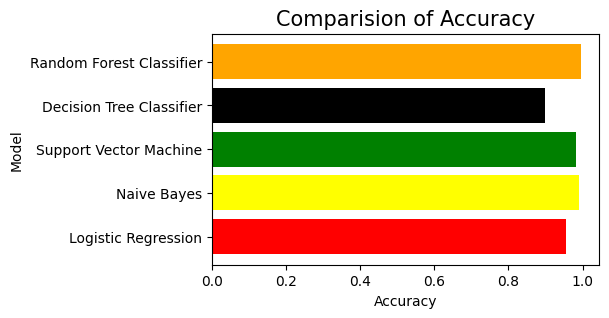

In [ ]:
plt.figure(figsize = (5, 3))
c = ['red', 'yellow', 'green', 'black', 'orange']
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Comparision of Accuracy', fontsize = 15)
plt.barh(accuracy.Model, accuracy.Accuracy, color = c);

# <font color = blue> HYPERPARAMETER TUNING</font>

<font color = green> **Random Forest Classifier**</font>

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10,15],
    'n_estimators': [50, 100, 150, 200],
    'min_samples_leaf': [1, 2, 3, 4]
}
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

In [ ]:
grid_search.best_score_

0.9950731244064578

<font color = green>**Decision Trees**</font>

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4]
}

clf = GridSearchCV(estimator =DT, param_grid = param_grid, cv = 5)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [ ]:
clf.best_score_

0.9901481481481482

<font color = green>**Accuracies after Hyperparameter Tuning**</font>

In [ ]:
accuracy_hp = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Decision Tree'],
    'Accuracy' : [grid_search.best_score_, clf.best_score_]},
    columns = ['Model', 'Accuracy']
)

In [ ]:
accuracy_hp

,Model,Accuracy
0,Random Forest Classifier,0.995073
1,Decision Tree,0.990148


Random Forest Classifier has the highest Accuracy.

Random Forest Classifier is used in making predictions.

# <font color = blue>MAKING PREDICTIONS</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, max_depth = 15, min_samples_leaf = 1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [ ]:
data = np.array([[52, 42, 95, 35, 45, 5, 45]])
prediction = model.predict(data)
print(prediction)

['mothbeans']


In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = model.predict(data)
print(prediction[0])

coffee
